# Task 3

#### Action I

#### Action II

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
columns = [
    "id", "clump_thickness", "uniformity_cell_size", "uniformity_cell_shape",
    "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei",
    "bland_chromatin", "normal_nucleoli", "mitoses", "class"
]
df = pd.read_csv(url, names=columns)

# Replace missing values marked as '?' with NaN and drop rows with missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Separate features and target
X = df.drop(columns=['id', 'class'])
y = df['class']


#### Action III

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

#### Action IV

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Action V

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {acc_logreg:.4f}")

Logistic Regression Accuracy: 0.9568


#### Action VI

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.4f}")

KNN Accuracy: 0.9568


#### Action VII

In [13]:
print(f"Logistic Regression vs KNN: {acc_logreg:.4f} vs {acc_knn:.4f}")

Logistic Regression vs KNN: 0.9568 vs 0.9568


#### Graphs

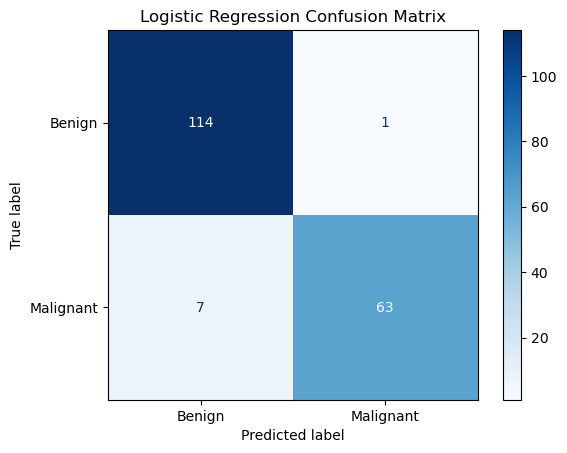

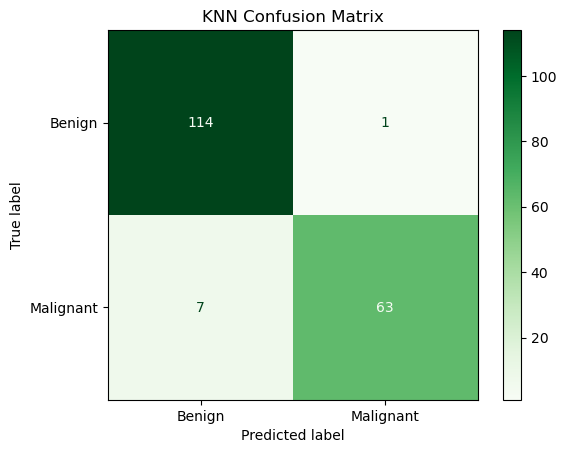

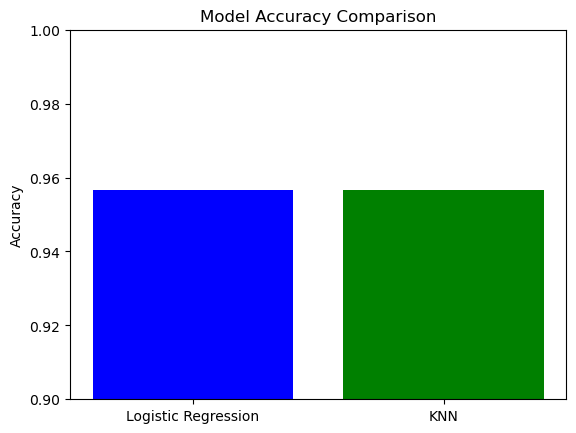

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=["Benign", "Malignant"])
disp_logreg.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Benign", "Malignant"])
disp_knn.plot(cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.show()

# Bar plot comparing accuracies
plt.bar(["Logistic Regression", "KNN"], [acc_logreg, acc_knn], color=['blue', 'green'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)
plt.show()